In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from scipy.stats import probplot
from scipy.stats import zscore
import scipy.stats as stats
import math
from scipy.stats import ttest_1samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway, kruskal, mannwhitneyu , levene, ttest_ind
from pingouin import welch_anova
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.preprocessing as sp
import statsmodels.stats.outliers_influence as smof
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.3, the latest is 0.3.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
from matplotlib import rcParams, cycler
rcParams['figure.figsize'] = 8,5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 1.5
rcParams['axes.prop_cycle'] = cycler(color=['#424242'])
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df1=pd.read_csv('Insurance data for model building Final.csv')
df1.head()

,Unnamed: 0,Coverage,Education,EmploymentStatus,Income,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Vehicle Class,Vehicle Size,Customer Lifetime Value_boxcox,Monthly Premium Auto_boxcox,Total Claim Amount_boxcox
0,0,0,2,4,56274,0,32,5,0,1,3,1,1,2.703839,0.685347,33.035752
1,1,1,2,1,0,1,13,42,0,8,2,0,1,2.754926,0.685871,56.357614
2,2,2,2,4,48767,0,18,38,0,2,3,1,1,2.780772,0.686039,40.071789
3,3,0,2,1,0,0,18,65,0,7,3,2,1,2.759125,0.686018,38.763252
4,4,0,2,4,43836,1,12,44,0,1,3,0,1,2.704995,0.685461,19.560154


In [4]:
X = df1.drop(['Customer Lifetime Value_boxcox', 'Unnamed: 0'], axis = 1)
y = df1['Customer Lifetime Value_boxcox']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [6]:
LR=LinearRegression()

In [7]:
LRm = LR.fit(X_train, y_train)
y_pred_train = LRm.predict(X_train)
y_pred_LR = LRm.predict(X_test)

In [8]:
print('LR original')
print ( "R2 Squared:" , r2_score ( y_test , y_pred_LR ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred_LR ) ) )

LR original
R2 Squared: 0.29844136325196224
Root Mean Squared Error: 0.02526656013864376


# Machine Learning Models

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

In [10]:
DT=DecisionTreeRegressor(random_state=0)
LR=LinearRegression()
knn=KNeighborsRegressor()
RF=RandomForestRegressor(random_state=0)
ABR = AdaBoostRegressor(random_state=0)
AB_RF = AdaBoostRegressor(base_estimator=RF, random_state=0)
AB_DT = AdaBoostRegressor(random_state=0)
GBoost=GradientBoostingRegressor(random_state=0)
xgbr=XGBRegressor(random_state=0)

In [ ]:
%%time
## Best hyperparamerts for Decision Tree

DT_params={'max_depth':np.arange(1,20),'min_samples_leaf':np.arange(2,10),'min_samples_split': np.arange(2,10)}
GS_DT=GridSearchCV(DT,DT_params,cv=10,scoring='neg_mean_squared_error')
GS_DT.fit(X,y)

In [11]:
DT=DecisionTreeRegressor(max_depth=8, min_samples_leaf= 8, min_samples_split=2)
knn=KNeighborsRegressor(n_neighbors=23, weights='uniform')
GBR=GradientBoostingRegressor(n_estimators=59,random_state=0)
xgbr = XGBRegressor(learning_rate= 0.1, max_depth= 7, min_child_weight= 4,n_estimators= 100,objective= 'reg:squarederror')
AB_DT = AdaBoostRegressor()
RF = RandomForestRegressor(n_estimators = 20, max_depth=8, min_samples_leaf= 8, min_samples_split=2)
AB_RF = AdaBoostRegressor()

In [12]:
X.columns

Index(['Coverage', 'Education', 'EmploymentStatus', 'Income', 'Marital Status',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type',
       'Vehicle Class', 'Vehicle Size', 'Monthly Premium Auto_boxcox',
       'Total Claim Amount_boxcox'],
      dtype='object')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
BaggingRegressor()

In [14]:
DT.fit(X_train,y_train)
knn.fit(X_train,y_train)
GBR.fit(X_train,y_train)
xgbr.fit(X_train,y_train)
AB_DT.fit(X_train,y_train)
RF.fit(X_train,y_train)
AB_RF.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [15]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

y_pred_DT = DT.predict(X_test)
print('DT')
print ( "R2 Squared:" , r2_score ( y_test , y_pred_DT ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred_DT ) ) )
print ( "Mean Absolute Error:" , np.sqrt ( mean_absolute_error ( y_test , y_pred_DT ) ), '\n' )


y_pred_knn = knn.predict(X_test)
print('knn')
print ( "R2 Squared:" , r2_score ( y_test , y_pred_knn ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred_knn ) ) )
print ( "Mean Absolute Error:" , np.sqrt ( mean_absolute_error ( y_test , y_pred_knn ) ), '\n' )

y_pred_GBR = GBR.predict(X_test)
print('GBR')
print ( "R2 Squared:" , r2_score ( y_test , y_pred_GBR ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred_GBR ) ) )
print ( "Mean Absolute Error:" , np.sqrt ( mean_absolute_error ( y_test , y_pred_GBR ) ), '\n' )

y_pred_xgbr = xgbr.predict(X_test)
print('xgbr')
print ( "R2 Squared:" , r2_score ( y_test , y_pred_xgbr ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred_xgbr ) ) )
print ( "Mean Absolute Error:" , np.sqrt ( mean_absolute_error ( y_test , y_pred_xgbr ) ), '\n' )

y_pred_ABDT = AB_DT.predict(X_test)
print('AB_DT')
print ( "R2 Squared:" , r2_score ( y_test , y_pred_ABDT ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred_ABDT ) ) )
print ( "Mean Absolute Error:" , np.sqrt ( mean_absolute_error ( y_test , y_pred_ABDT ) ), '\n' )

y_pred_RF = RF.predict(X_test)
print('RF')
print ( "R2 Squared:" , r2_score ( y_test , y_pred_RF ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred_RF ) ) )
print ( "Mean Absolute Error:" , np.sqrt ( mean_absolute_error ( y_test , y_pred_RF ) ), '\n' )

y_pred_ABRF = AB_RF.predict(X_test)
print('AB_RF')
print ( "R2 Squared:" , r2_score ( y_test , y_pred_ABRF ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred_ABRF ) ) )
print ( "Mean Absolute Error:" , np.sqrt ( mean_absolute_error ( y_test , y_pred_ABRF ) ), '\n' )

DT
R2 Squared: 0.9372501334672602
Root Mean Squared Error: 0.007556497366238492
Mean Absolute Error: 0.063791283162595 

knn
R2 Squared: 0.028368850621687147
Root Mean Squared Error: 0.02973478802150843
Mean Absolute Error: 0.15492287283248116 

GBR
R2 Squared: 0.9420265815255844
Root Mean Squared Error: 0.0072632097657689965
Mean Absolute Error: 0.06316763176575527 

xgbr
R2 Squared: 0.9464286274715921
Root Mean Squared Error: 0.006982010840757548
Mean Absolute Error: 0.06109432267468925 

AB_DT
R2 Squared: 0.9070610474777507
Root Mean Squared Error: 0.00919629763909556
Mean Absolute Error: 0.08294801174420367 

RF
R2 Squared: 0.9422415496018751
Root Mean Squared Error: 0.0072497311029717125
Mean Absolute Error: 0.06243041378467633 

AB_RF
R2 Squared: 0.9102979868909901
Root Mean Squared Error: 0.009034731011007033
Mean Absolute Error: 0.08217602545345812 



In [36]:
pred = pd.DataFrame(y_test)
pred['RF'] = y_pred_RF
pred['Customer Lifetime Value_boxcox'] = pred['Customer Lifetime Value_boxcox']
pred['RF'] = pred['RF']
pred['boolean'] = pred['Customer Lifetime Value_boxcox']==pred['RF']
pred['Accuracy %'] = (pred['RF']/pred['Customer Lifetime Value_boxcox'])*100
pred['Error %'] = 100-pred['Accuracy %']

pred['Actual CLV'] = df['Customer Lifetime Value']
pred['Predicted CLV'] = (pred['RF'])**2
pred['Actual Accuracy %'] = (pred['Predicted CLV']/pred['Actual CLV'])*100
pred['Actual Error %'] = 100-pred['Actual Accuracy %']
pred

NameError: name 'df' is not defined

In [33]:
pred.to_csv('boxcox pred.csv')

In [34]:
pred['boolean'].value_counts()

False    2741
Name: boolean, dtype: int64

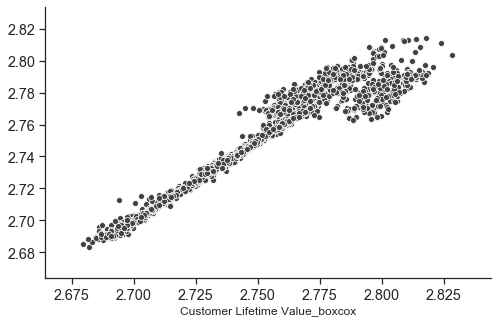

In [35]:
sns.scatterplot(y_test, y_pred_RF)

#### K-fold

In [ ]:
from sklearn import model_selection

models=[]
models.append(('DecisionTreeRegressor',DT))
models.append(('KNearestNeighbours',knn))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XG Boost',xgbr))
models.append(('Adaboost DT',AB_DT))
models.append(('Random Forest',RF))
models.append(('Adaboost RF',AB_RF))
results=[]
names=[]
for name, model in models:
   
    cv_results = model_selection.cross_val_score(model, X, y, cv = 10, scoring = 'neg_mean_absolute_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name, np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)), ddof = 1)))
    
fig = plt.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

DecisionTreeRegressor: 0.063883 (0.000004)
KNearestNeighbours: 0.156211 (0.000004)
GradientBoostingRegressor: 0.063478 (0.000003)
XG Boost: 0.061171 (0.000004)
Adaboost DT: 0.083509 (0.000002)
Random Forest: 0.062653 (0.000004)
